## Case Study: 
## PREDICTING A PULSAR STAR


### Introduction:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### Data Required 

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class
HTRU 2 Summary 
17,898 total examples. 
1,639 positive examples. 
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

### Credit 

Data from:
        
17,898 total examples. 
1,639 positive examples. 
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

Dr Robert Lyon 
University of Manchester 
School of Physics and Astronomy 
Alan Turing Building 
Manchester M13 9PL 
United Kingdom 
robert.lyon '@' manchester.ac.uk

In [10]:
!pip install tensorflow

In [11]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns

import tensorflow
from tensorflow.keras        import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import balanced_accuracy_score
from sklearn.metrics         import f1_score, confusion_matrix
from sklearn.metrics         import recall_score

from sklearn.preprocessing   import StandardScaler

In [48]:
sns.set(style="darkgrid")

In [13]:
pulsar_df = pd.read_csv('./pulsar_stars.csv')

In [14]:
pulsar_df.shape 

(17898, 9)

In [21]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [15]:
pulsar_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [30]:
pulsar_df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

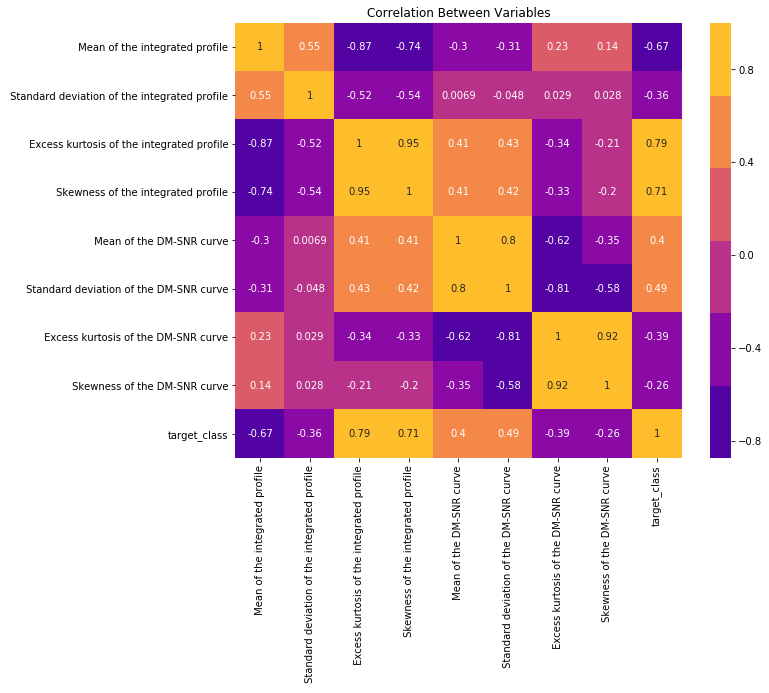

In [33]:
correlation = pulsar_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("plasma"))
plt.title("Correlation Between Variables")
plt.show()

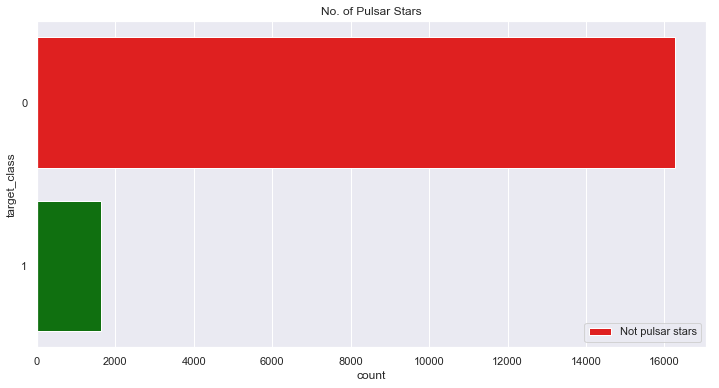

In [65]:
plt.figure(figsize=(12,6))
plt.title('No. of Pulsar Stars')
ax = sns.countplot(y = pulsar_df["target_class"],
                   palette=["red","green"])
ax.legend(labels = ['Not pulsar stars','Pulsar stars'],loc = 'lower right')

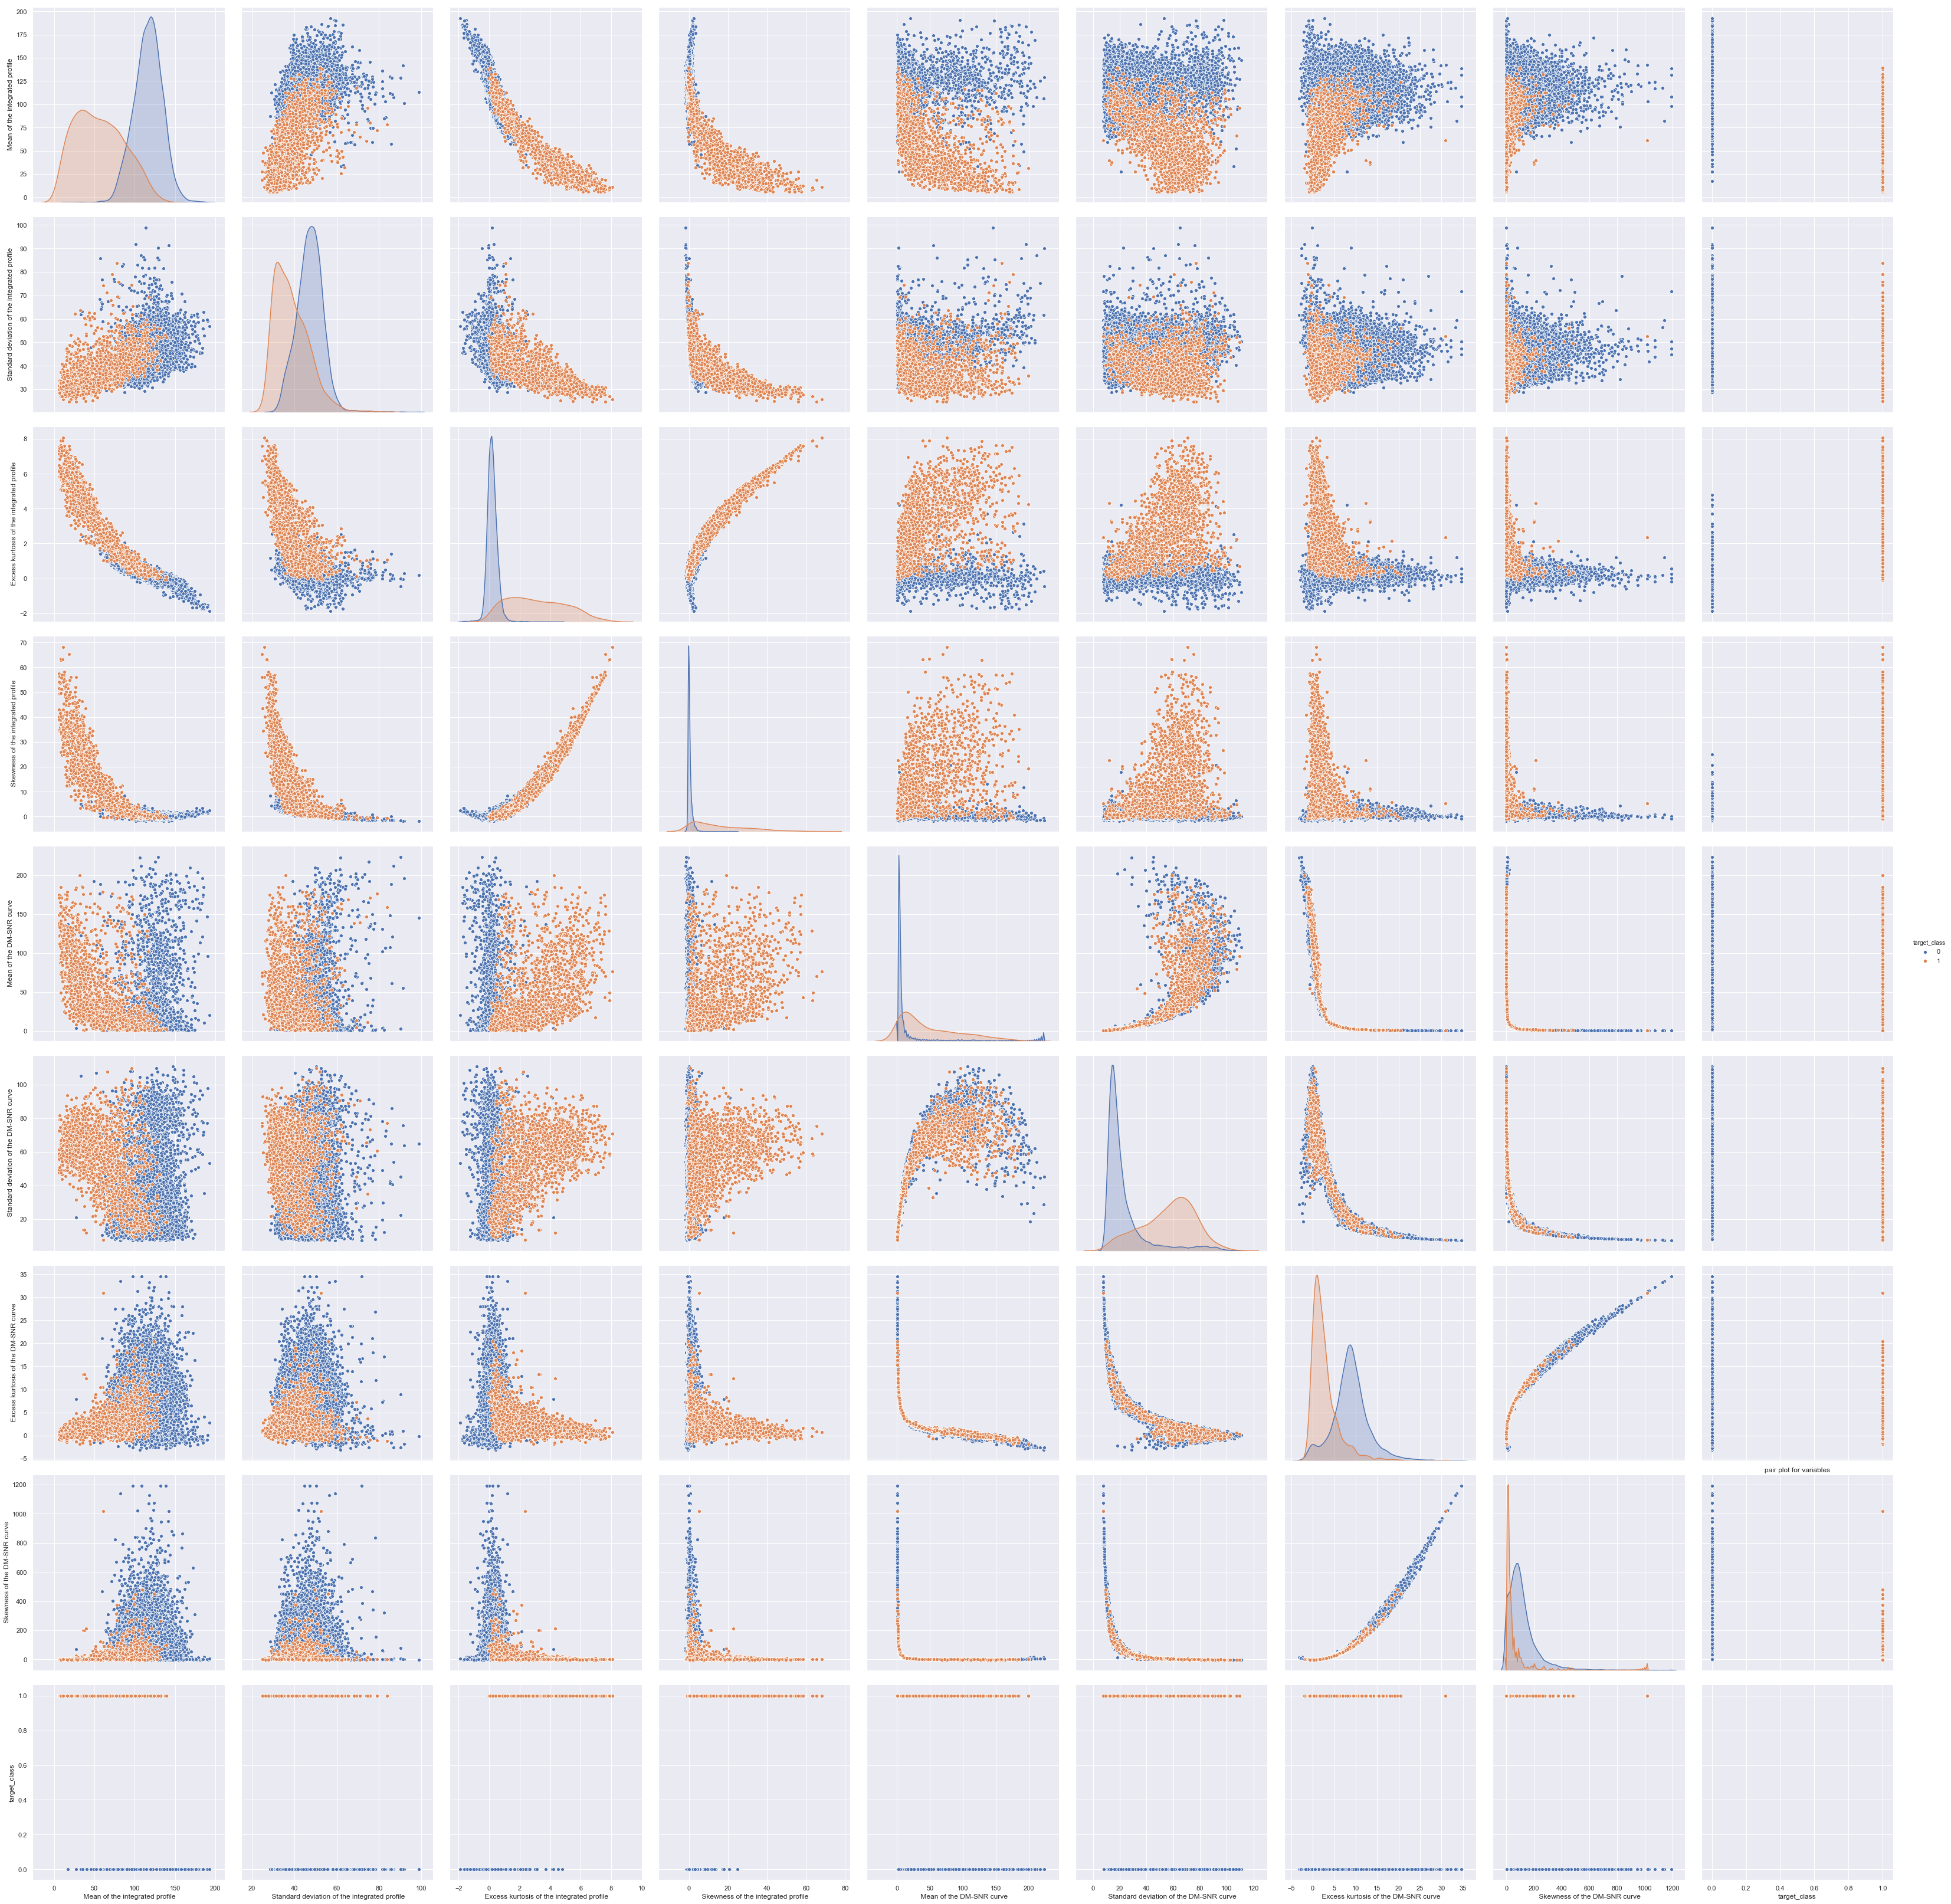

In [67]:
sns.pairplot(pulsar_df,hue="target_class", height = 5)
plt.title("pair plot for variables")
plt.show()

In [70]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(pulsar_df,test_size = 0.2, random_state = 1)

In [71]:
print(train.shape)
print(test.shape)

(14318, 9)
(3580, 9)


In [76]:
train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in ["target_class"]]]
test_Y  = test[["target_class"]]

In [73]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc

rf.fit(train_X,train_Y)
prediction = rf.predict(test_X)

print(rf)

C:\Users\deshm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)



accuracy_score : 0.9787709497206704


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

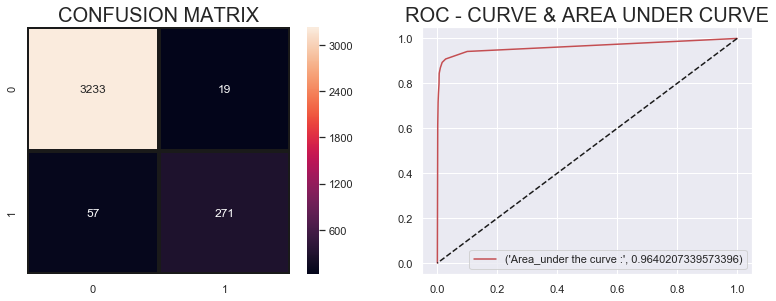

In [83]:
 print ("\naccuracy_score :",accuracy_score(test_Y,prediction))
            
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_Y,prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
    
predicting_probabilites = rf.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_Y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)